Minkowski Distance

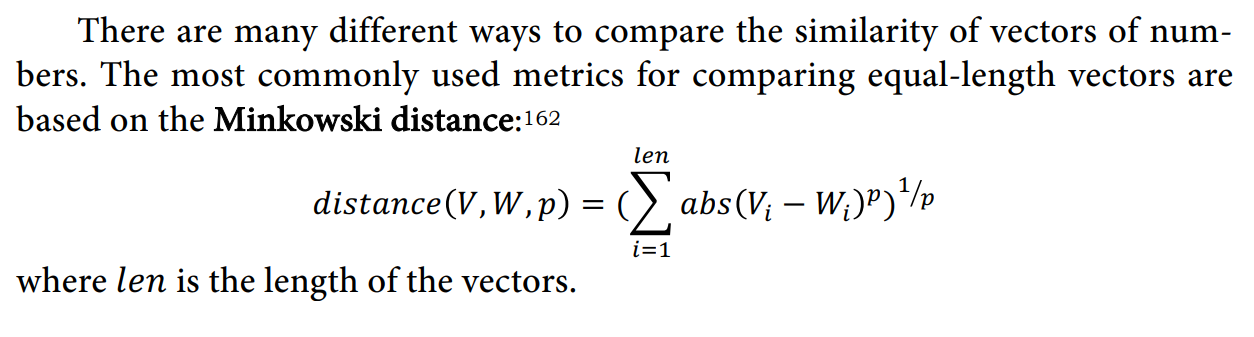

In [18]:
# Minkowski Distance
def minkowskiDist(v1, v2, p=2):
    """Calculates the Minkowski distance of order p, between v1 and v2
    Assumes v1 and v2 are same shape nx1 vectors.

    Args:
        v1 (list): vector 1
        v2 (list): vector 2
        p (int): Order of the Minkowski distance.
            p = 1 -> Manhattan Distance
            p = 2 -> Euclidian Distance (default)
            p = 3 -> Minkowski Distance
    """
    return (sum([abs(i - j)**p for i, j in zip(v1, v2)]))**(1/p)

In [19]:
minkowskiDist([0, 0], [3, 4], 2)

5.0

In [20]:
import numpy as np

class Animal(object):
    def __init__(self, name, features):
        """Assumes name a string; features a list of numbers"""
        self.name = name
        self.features = np.array(features)

    def getName(self):
        return self.name

    def getFeatures(self):
        return self.features

    def distance(self, other):
        """Assumes other an Animal
        Returns the Euclidean distance between feature vectors
        of self and other"""
        return minkowskiDist(self.getFeatures(),
        other.getFeatures(), 2)

____________

# Clustering

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

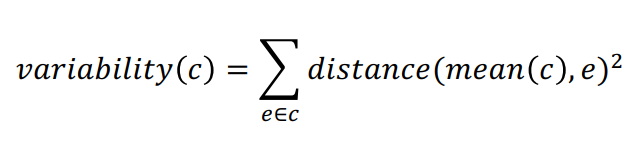

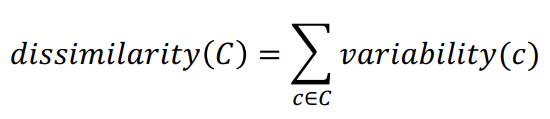

In [22]:
class Example(object):

    def __init__(self, name, features, label = None):
        # Assumes features is an array of floats
        self.name = name
        self.features = features
        self.label = label

    def dimensionality(self):
        return len(self.features)
    
    def getFeatures(self):
        return self.features[:]

    def getLabel(self):
        return self.label

    def getName(self):
        return self.name

    def distance(self, other):
        return minkowskiDist(self.features, other.getFeatures(), 2)  # p=2, returns Euclidian distance

    def __str__(self):
        return self.name +':'+ str(self.features) + ':'\
            + str(self.label)
            
    def __eq__(self, other) -> bool:
        return np.isclose(self.getFeatures(), other.getFeatures())

Then, class **Cluster** is <u> a set of examples </u>

In [23]:
class Cluster(object):

    def __init__(self, examples):
        """Assumes examples a non-empty list of Examples"""
        self.examples = examples
        self.centroid = self.computeCentroid()

    def update(self, examples):
        """Assume examples is a non-empty list of Examples
        Replace examples; return amount centroid has changed"""
        oldCentroid = self.centroid
        self.examples = examples
        self.centroid = self.computeCentroid()
        return oldCentroid.distance(self.centroid)

    def computeCentroid(self):
        vals = np.array([0.0]*self.examples[0].dimensionality())
        for e in self.examples: #compute mean
            vals += e.getFeatures()
        centroid = Example('centroid', vals / len(self.examples))
        return centroid

    def getCentroid(self):
        return self.centroid

    def variability(self):
        totDist = 0.0
        for e in self.examples:
            totDist += (e.distance(self.centroid))**2
        return totDist

    def members(self):
        for e in self.examples:
            yield e
            
    def __str__(self):
        names = []
        for e in self.examples:
            names.append(e.getName())
        names.sort()
        result = 'Cluster with centroid '\
            + str(self.centroid.getFeatures()) + ' contains:\n '
        for e in names:
            result = result + e + ', '
        return result[:-2] #remove trailing comma and space

## K-means clustering

There is an iterative **greedy** algorithm to calculate K-means clustering:

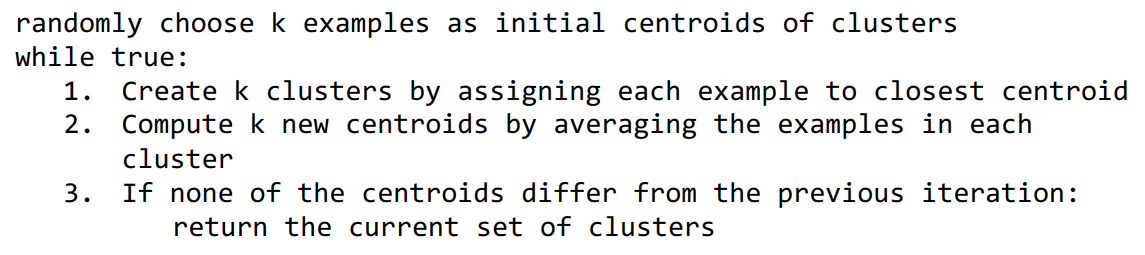

In [ ]:
import random

def dissimilarity(clusters):
    totDist = 0.0
    for c in clusters:
        totDist += c.variability()
    return totDist

def kmeans(examples, k, verbose = False):
    #Get k randomly chosen initial centroids, create cluster for each
    initialCentroids = random.sample(examples, k)
    clusters = []
    for e in initialCentroids:
        clusters.append(Cluster([e]))

    #Iterate until centroids do not change
    converged = False
    numIterations = 0
    while not converged:  # Enter main loop
        numIterations += 1
        #Create a list containing k distinct empty lists
        newClusters = []
        for i in range(k):
            newClusters.append([])

        #Associate each example with closest centroid
        for e in examples:
            #Find the centroid closest to e
            smallestDistance = e.distance(clusters[0].getCentroid())
            index = 0
            for i in range(1, k):
                distance = e.distance(clusters[i].getCentroid())
                if distance < smallestDistance:
                    smallestDistance = distance
                    index = i
            #Add e to the list of examples for appropriate cluster
            newClusters[index].append(e)

        for c in newClusters: #Avoid having empty clusters
            if len(c) == 0:
                raise ValueError('Empty Cluster')

        # Update each cluster; check if a centroid has changed
        converged = True
        for i in range(k):
            if clusters[i].update(newClusters[i]) > 0.0:  # checks if the distance between new
                                                        # and old centroid is greater than 0
                converged = False
        if verbose:
            print('Iteration #' + str(numIterations))
            for c in clusters:
                print(c)
            print('') #add blank line
    return clusters

def trykmeans(examples, numClusters, numTrials, verbose = False):
    """Calls kmeans numTrials times and returns the result with the
    lowest dissimilarity"""
    best = kmeans(examples, numClusters, verbose)
    minDissimilarity = dissimilarity(best)
    trial = 1
    while trial < numTrials:
        try:
            clusters = kmeans(examples, numClusters, verbose)
        except ValueError:
            continue  # If failed, try again
        currDissimilarity = dissimilarity(clusters)
        if currDissimilarity < minDissimilarity:
            best = clusters
            minDissimilarity = currDissimilarity
        trial += 1
    return best